In [1]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np 
import xarray as xr
import math 
import pickle

data = Dataset('/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/domain/bathymetry_ORCA12_V3.3.nc')
m = data['mask']
lon = data['nav_lon']
lat = data['nav_lat']
bathy = data['Bathymetry']


mask = xr.open_dataset('/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/domain/bathymetry_ORCA12_V3.3.nc') #, decode_times=False)
Lat, Lon, Mask = mask.variables['nav_lat'], mask.variables['nav_lon'], mask.variables['mask']
latvals = Lat[:]; lonvals = Lon[:]; maskvals = Mask[:] # extract lat/lon values to numpy arrays
#print(lonvals.data)

def getclosest_ij(lats,lons,latpt,lonpt):     
    """Function to find the index of the closest point to a certain lon/lat value."""
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2                 # find squared distance of every point on grid
    minindex_flattened = dist_sq.argmin()                       # 1D index of minimum dist_sq element
    return np.unravel_index(minindex_flattened, lats.shape)     # Get 2D index for latvals and lonvals arrays from 1D index

In [2]:
lat_1deg = np.arange(60,-70,-10)
lon_1deg = np.arange(-180,180,10) 

nla = len(lat_1deg)
nlo = len(lon_1deg)

Y = []
X = []
iy = [] #np.zeros(nla,nlo)#, dtype=list)
ix = [] #np.zeros(nla,nlo)#, dtype=int)
lat_mask = []
lon_mask = []

for la in range(nla):
    for lo in range(nlo):    
        Y, X = getclosest_ij(latvals, lonvals, lat_1deg[la],lon_1deg[lo]) #iy[la,lo], ix[la,lo] = getclosest_ij(latvals, lonvals, lat_1deg[la],lon_1deg[lo])
        if m[Y,X] == 1: # 1 = ocean, 0 = land
            iy.append(Y) #iy[la,lo] = Y
            ix.append(X) #ix[la,lo] = X
            lat_mask.append(latvals[Y,X])
            lon_mask.append(lonvals[Y,X])
            

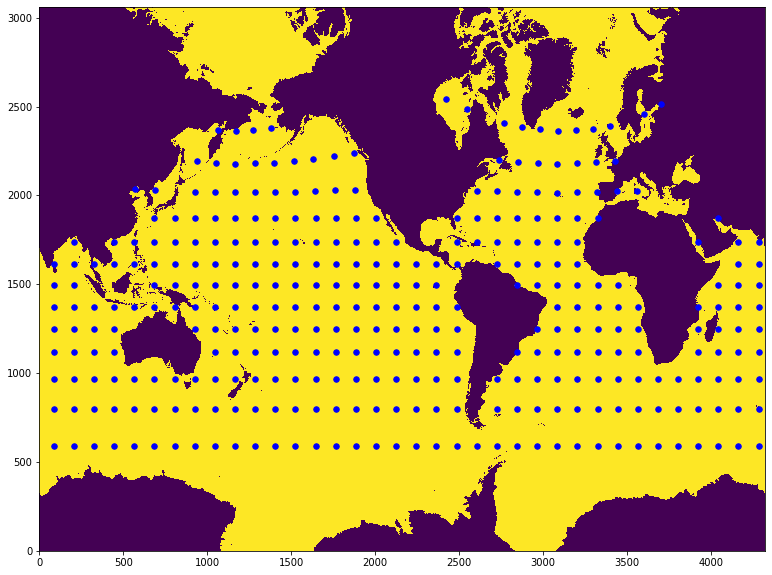

In [3]:
fig = plt.figure(figsize=(13,10))
plt.pcolormesh(m,zorder=1)
plt.scatter(ix,iy,color='blue',s=30,zorder=2)

In [5]:
# Save particle release lat and lon locations 

#with open('/home/dlobelle/Kooi_data/data_input/mask_globalNEMO_10x10_lat_lon.pickle', 'wb') as f:  
#    pickle.dump([lat_mask, lon_mask], f)

In [7]:
##########


## THESE NEXT CELLS WERE TESTS (e.g. before using the getclosest_ij function and when trying to get bathymetry where deeper than 10 m (further away from coast))


# lonvals_pc = lonvals.T
# latvals_pc = latvals.T
# maskvals_pc = maskvals.T
# plt.pcolormesh(lonvals_pc,latvals_pc,maskvals_pc) #(lon,lat,m)
#plt.scatter(lon[:],lat[:],m[:],c=m[:])


In [8]:
# lon_1deg = np.arange(-180,180,1)
# lat_1deg = np.arange(70,-70,-1)

# for nlo in range(len(lon_1deg)):
#     for nla in range(len(lat_1deg)):
#         test = np.where(min(abs(lon_1deg[nlo]-lonvals)) && min(abs(lat_1deg[nla]-latvals)))
            
    
# t = np.array(lat)
# t2 = np.array(lon[:,])
# print(t2) #lon[:,:])
# #test = np.round(lat[:,:])
# #print(test)

In [9]:
#print(np.array(bathy).shape)
#rows, cols = np.where(np.array(bathy)>10)

#print(cols)

#bathy10 = bathy[rows,cols]
#print(rows[:].shape)
# bathy10 = bathy[i_bathy10]
# print(i_bathy10[0].shape)
# print(bathy.shape)
#plt.scatter(lon[:],lat[:],m[:],c=m[:])

(8055969,)


In [10]:
# bath_v = np.reshape(bathy,bathy.shape[0]*bathy.shape[1])
# lon_v = np.reshape(lon,lon.shape[0]*lon.shape[1])
# lat_v = np.reshape(lat,lat.shape[0]*lat.shape[1])

# i = bath_v>10
# b = bath_v[i]
# lo = lon_v[i]
# la = lat_v[i]

#plt.scatter(lo[:],la[:],b[:],c=b[:])